<a href="https://colab.research.google.com/github/BenHenderson09/H5/blob/main/Pitch_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

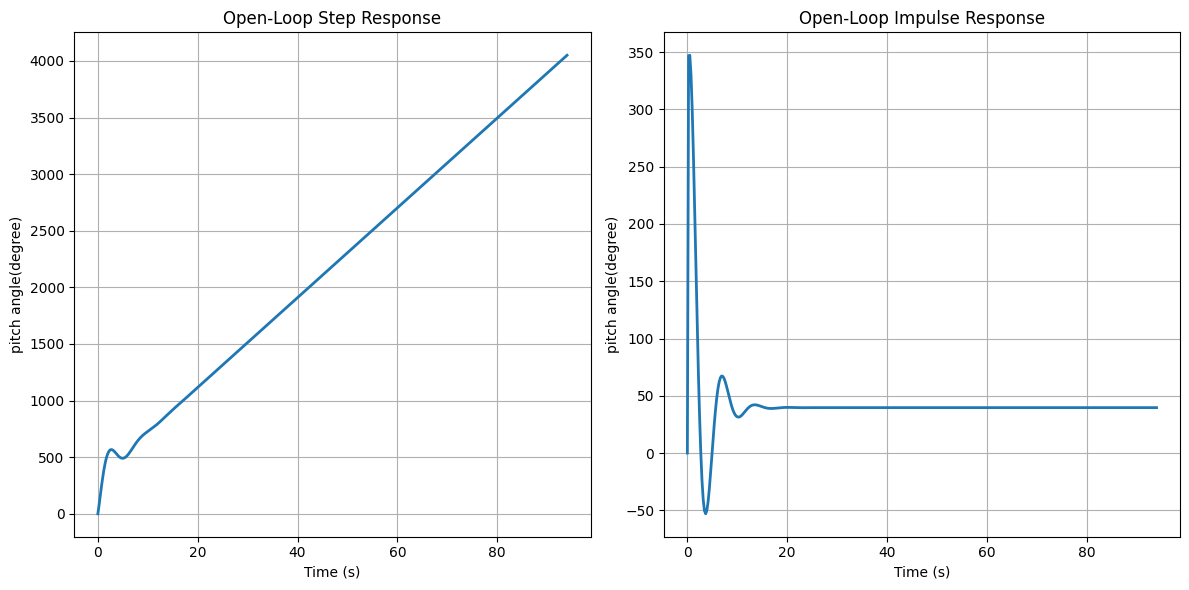

In [ ]:
!pip install control
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

s = ctrl.TransferFunction.s
Gc = 5 * (1 + 1*s)
Gs = (1.151*s + 0.1463) / (s*(s**2 + 0.735*s + 1.05015))
Ga = 1 / (0.0145*s + 1)
Gm = np.exp(-0.0063) / (0.0021*s + 1)
G_open = ctrl.series(Gc, Gs, Ga, Gm)

# impulse
t_step, y_step = ctrl.step_response(G_open)

# step
t_impulse, y_impulse = ctrl.impulse_response(G_open)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(t_step, np.rad2deg(y_step), linewidth=2)
plt.title('Open-Loop Step Response')
plt.xlabel('Time (s)')
plt.ylabel('pitch angle(degree)')
plt.grid(True)

plt.subplot(122)

plt.plot(t_impulse, np.rad2deg(y_impulse), linewidth=2)
plt.title('Open-Loop Impulse Response')
plt.xlabel('Time (s)')
plt.ylabel('pitch angle(degree)')
plt.grid(True)

plt.tight_layout()
plt.show()

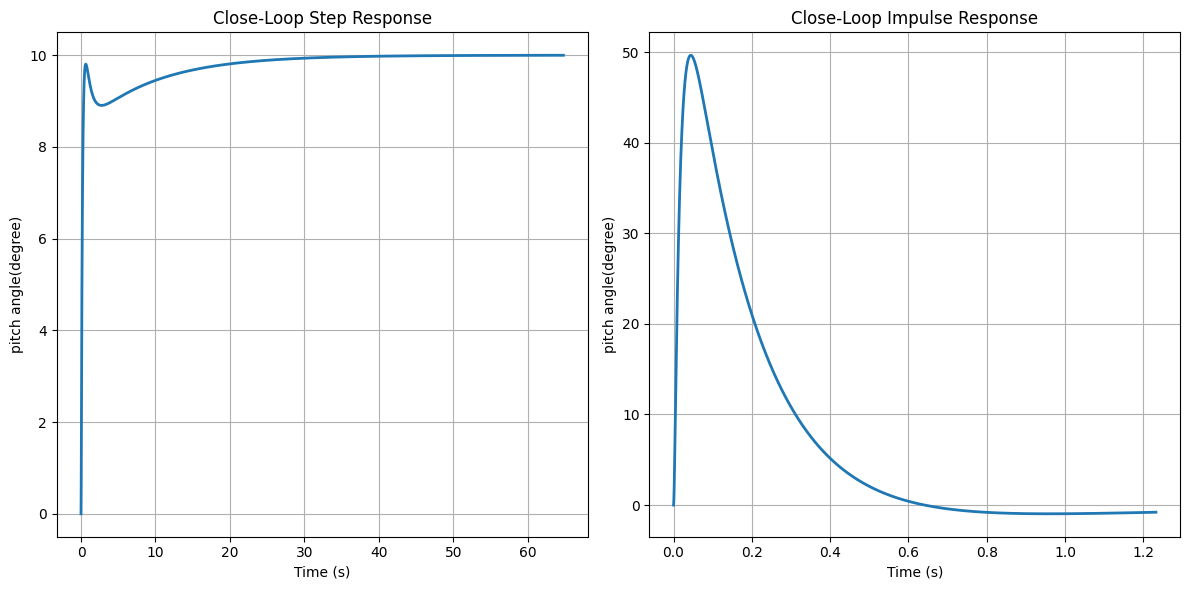

In [ ]:
Gtheta=0.1745
G_op=ctrl.feedback(G_open,1)
G_cl=ctrl.series(G_op,Gtheta)

t_step_cl, y_step_cl = ctrl.step_response(G_cl)
t_impulse_cl, y_impulse_cl = ctrl.impulse_response(G_cl)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(t_step_cl, np.rad2deg(y_step_cl), linewidth=2)
plt.title('Close-Loop Step Response')
plt.xlabel('Time (s)')
plt.ylabel('pitch angle(degree)')
plt.grid(True)

plt.subplot(122)
plt.plot(t_impulse_cl, np.rad2deg(y_impulse_cl), linewidth=2)
plt.title('Close-Loop Impulse Response')
plt.xlabel('Time (s)')
plt.ylabel('pitch angle(degree)')
plt.grid(True)

plt.tight_layout()
plt.show()